In [1]:
%matplotlib notebook

import sys
import logging
import matplotlib.pyplot as plt

sys.path.append ("../DesignTool")
from smdtLibs.configFile import ConfigFile
from targets import TargetList
from smdtLibs.inOutChecker import InOutChecker
from maskDesignFile import MaskDesignFile
from maskLayouts import MaskLayouts, shrinkMask
from smdtLibs import utils

In [2]:
logging.disable()

## Initialize configuration and read parameter file

In [3]:
config_fname = "../DesignTool/smdt.cfg"
param_fname = "../DesignTool/params.cfg"

config = ConfigFile(config_fname)
config.properties["params"] = ConfigFile(param_fname)

In [4]:
#
# Read the targets from the input data file
#
input_fname = "../DeimosExamples/MihoIshigaki/CetusIII.lst"

tlist = TargetList(input_fname, useDSS=False, config=config)

### What is in tlist?

In [5]:
print ("Center RA = {} hrs".format(utils.toSexagecimal(tlist.centerRADeg/15)))
print ("       DEC= {} deg".format(utils.toSexagecimal(tlist.centerDEC)))

print ("       PA = {:.3f} deg".format(tlist.positionAngle))

Center RA =  02:05:10.30 hrs
       DEC= -04:15:11.50 deg
       PA = -52.000 deg


In [6]:
#
# tlist.targets is a pandas dataframe
#
tlist.targets

,name,raHour,decDeg,eqx,mag,band,pcode,sample,selected,slitPA,length1,length2,slitWidth,orgIndex,inMask,xarcs,yarcs
0,1,2.084889,-4.255639,2000.0,20.008,R,50,1,1,0.0,4.0,4.0,1.5,0,0,49.980289,50.222894
1,2,2.088083,-4.270861,2000.0,20.196,R,50,1,1,0.0,4.0,4.0,1.5,1,0,-119.310483,-12.511104
2,3,2.085528,-4.316333,2000.0,20.842,R,50,1,1,0.0,4.0,4.0,1.5,2,0,-111.664325,201.210177
3,4,2.089611,-4.273306,2000.0,21.265,R,50,1,1,0.0,4.0,4.0,1.5,3,0,-189.558263,-56.228187
4,5,2.090056,-4.273750,2000.0,21.735,R,40,1,1,0.0,4.0,4.0,1.5,4,0,-209.403163,-69.701962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,S00232122246,2.080017,-4.100433,2000.0,16.890,R,-2,3,0,0.0,4.0,4.0,1.5,313,0,600.764129,-228.467236
314,S00232122228,2.080390,-4.103178,2000.0,17.370,R,-2,3,0,0.0,4.0,4.0,1.5,314,0,578.848187,-233.056213
315,S00232122252,2.081685,-4.098625,2000.0,17.590,R,-2,3,0,0.0,4.0,4.0,1.5,315,0,534.006342,-288.903470
316,S00232122134,2.081672,-4.122758,2000.0,18.300,R,-2,3,0,0.0,4.0,4.0,1.5,316,0,481.061547,-220.015596


## Plots

In [7]:
# 
# Prepare for display
#
targets = tlist.targets
layout = utils.transpose (MaskLayouts['deimos'])

## Plot all targets

<IPython.core.display.Javascript object>


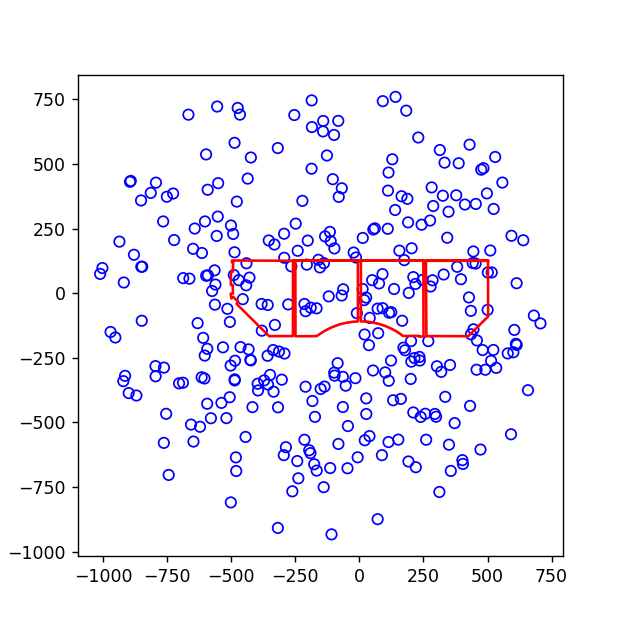

In [11]:
plt.figure(figsize=(5, 5))

plt.scatter (targets.xarcs, targets.yarcs, fc='None', ec='b')

# Plot the mask layout
plt.plot(layout[0], layout[1], 'r-')

### Plot only inside the mask

<IPython.core.display.Javascript object>


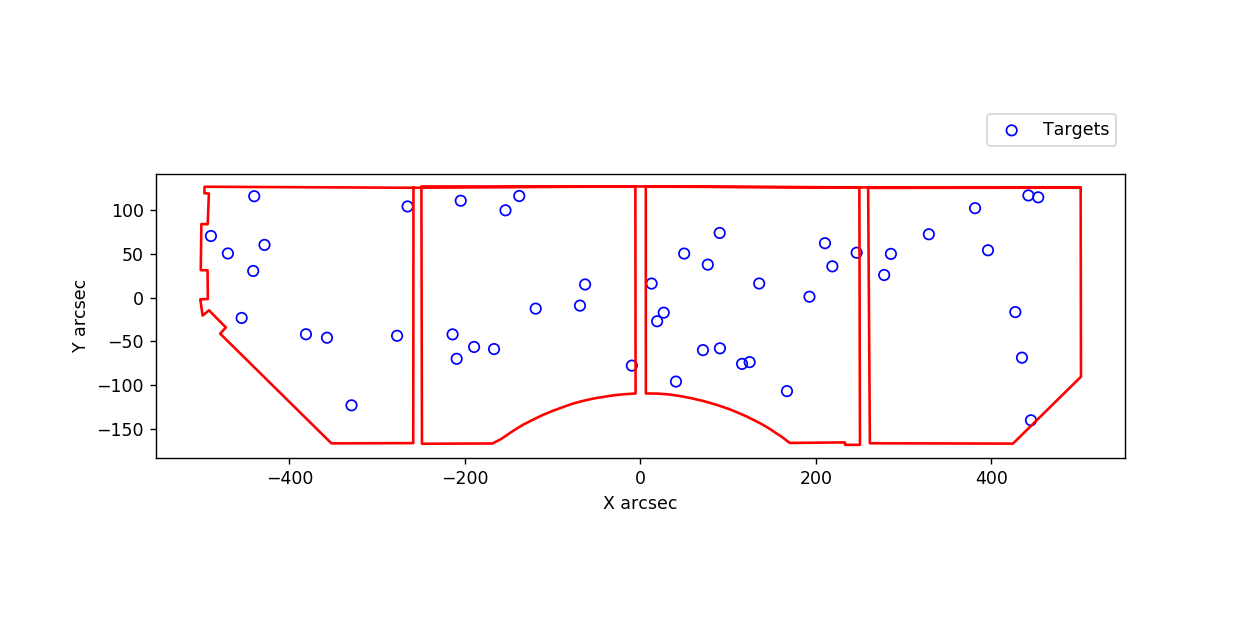

Text(0, 0.5, 'Y arcsec')

In [22]:
plt.figure(figsize=(10, 5))
plt.gca().set_aspect('equal')

tlist.markInside(shrinkMask(MaskLayouts['deimos'], 3))
inTargets = targets[targets.inMask > 0]

plt.scatter (inTargets.xarcs, inTargets.yarcs, fc='None', ec='b', label='Targets')

# Plot the mask layout
plt.plot(layout[0], layout[1], 'r-')

plt.legend(bbox_to_anchor=(1, 1.24), loc='upper right')
plt.xlabel ("X arcsec")
plt.ylabel ("Y arcsec")